In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

#so i can see all the columns
pd.set_option('display.max_columns', None)

In [2]:
#got the table from https://nces.ed.gov/ccd/elsi/tableGenerator.aspx?savedTableID=357854
#need to click a bunch of check boxes and the interface can only handle a few years at a time
#then exported as a csv once it had generated the table I needed
#the csv version of the table brings in lines that the begining that throw everything off so you have to cut the first 6
#there is a footer that isn't necessary, but also doesn't really hurt anything, so I removed it as well (7 lines total)

df=pd.read_csv('../CAPSTONE_DATA/ELSI_csv_export_soc_grad_rate.csv', skiprows= range(0,6),skipfooter=7)

<ipython-input-2-0ab7779fb4d8>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('../CAPSTONE_DATA/ELSI_csv_export_soc_grad_rate.csv', skiprows= range(0,6),skipfooter=7)


In [3]:
#replaced all the symbols in the df to 0s so that I can change these columns into intergers since they are currently objects
df=df.replace(['†','–','="0"','‡'],'0')

In [4]:
df.columns

Index(['Agency Name', 'State Name [District] Latest available year',
       'State Name [District] 1996-97', 'State Name [District] 1995-96',
       'State Name [District] 1994-95', 'State Name [District] 1993-94',
       'State Name [District] 1992-93', 'State Name [District] 1991-92',
       'State Name [District] 1990-91', 'State Name [District] 1989-90',
       'State Name [District] 1988-89', 'County Number [District] 1996-97',
       'County Number [District] 1995-96', 'County Number [District] 1994-95',
       'County Number [District] 1993-94', 'County Number [District] 1992-93',
       'County Number [District] 1991-92', 'County Number [District] 1990-91',
       'County Number [District] 1989-90', 'County Number [District] 1988-89',
       'Diploma Recipients (**) [District] 1996-97',
       'Diploma Recipients (**) [District] 1995-96',
       'Diploma Recipients (**) [District] 1994-95',
       'Diploma Recipients (**) [District] 1993-94',
       'Diploma Recipients (**) [Di

In [5]:
#changing the columns below into intergers from objects so that calculations and visualizations can be done. 
df[['Diploma Recipients (**) [District] 1996-97',
       'Diploma Recipients (**) [District] 1995-96',
       'Diploma Recipients (**) [District] 1994-95',
       'Diploma Recipients (**) [District] 1993-94',
       'Diploma Recipients (**) [District] 1992-93',
       'Diploma Recipients (**) [District] 1991-92',
       'Diploma Recipients (**) [District] 1990-91',
       'Diploma Recipients (**) [District] 1989-90',
       'Diploma Recipients (**) [District] 1988-89',
       'Grade 12 Students [Public School] 1996-97',
       'Grade 12 Students [Public School] 1995-96',
       'Grade 12 Students [Public School] 1994-95',
       'Grade 12 Students [Public School] 1993-94',
       'Grade 12 Students [Public School] 1992-93',
       'Grade 12 Students [Public School] 1991-92',
       'Grade 12 Students [Public School] 1990-91',
       'Grade 12 Students [Public School] 1989-90',
       'Grade 12 Students [Public School] 1988-89']]=df[[
       'Diploma Recipients (**) [District] 1996-97',
       'Diploma Recipients (**) [District] 1995-96',
       'Diploma Recipients (**) [District] 1994-95',
       'Diploma Recipients (**) [District] 1993-94',
       'Diploma Recipients (**) [District] 1992-93',
       'Diploma Recipients (**) [District] 1991-92',
       'Diploma Recipients (**) [District] 1990-91',
       'Diploma Recipients (**) [District] 1989-90',
       'Diploma Recipients (**) [District] 1988-89',
       'Grade 12 Students [Public School] 1996-97',
       'Grade 12 Students [Public School] 1995-96',
       'Grade 12 Students [Public School] 1994-95',
       'Grade 12 Students [Public School] 1993-94',
       'Grade 12 Students [Public School] 1992-93',
       'Grade 12 Students [Public School] 1991-92',
       'Grade 12 Students [Public School] 1990-91',
       'Grade 12 Students [Public School] 1989-90',
       'Grade 12 Students [Public School] 1988-89']].astype('float')

Planning on getting at least 3 schools that are year round and comparing their dropout rate and freshman grad rate with the average of those districts that surround them.  Will do the same with the cost per student and pay look at current and longterm cost as well.  Would Ideally be able to automate so that I don't have to look on a map for each school.  If I can then I could scale up to more year round schools for a more comprehensive look.  Ideally would like to automate determining schools that are year round from those that aren't so that can be scaled easily too.

Would also be nice to look at the before and after for 5 years for schools that made the transition from normal to year round. A look at schools that went the other way would be nice as well.

These two methods would allow me to compare places against themselves and against others

In [6]:
#pulling out the schools that are surrounding socorro, the school i'm interested in, district number is more helpful than city here
# also resetting the index 

socorro_df=df[df['County Number [District] 1989-90']=='48141'].reset_index(drop=True)
socorro_df

,Agency Name,State Name [District] Latest available year,State Name [District] 1996-97,State Name [District] 1995-96,State Name [District] 1994-95,State Name [District] 1993-94,State Name [District] 1992-93,State Name [District] 1991-92,State Name [District] 1990-91,State Name [District] 1989-90,State Name [District] 1988-89,County Number [District] 1996-97,County Number [District] 1995-96,County Number [District] 1994-95,County Number [District] 1993-94,County Number [District] 1992-93,County Number [District] 1991-92,County Number [District] 1990-91,County Number [District] 1989-90,County Number [District] 1988-89,Diploma Recipients (**) [District] 1996-97,Diploma Recipients (**) [District] 1995-96,Diploma Recipients (**) [District] 1994-95,Diploma Recipients (**) [District] 1993-94,Diploma Recipients (**) [District] 1992-93,Diploma Recipients (**) [District] 1991-92,Diploma Recipients (**) [District] 1990-91,Diploma Recipients (**) [District] 1989-90,Diploma Recipients (**) [District] 1988-89,Grade 12 Students [Public School] 1996-97,Grade 12 Students [Public School] 1995-96,Grade 12 Students [Public School] 1994-95,Grade 12 Students [Public School] 1993-94,Grade 12 Students [Public School] 1992-93,Grade 12 Students [Public School] 1991-92,Grade 12 Students [Public School] 1990-91,Grade 12 Students [Public School] 1989-90,Grade 12 Students [Public School] 1988-89
0,ANTHONY ISD,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,48141,48141,48141,48141,48141,48141,48141,48141,48141,38.0,39.0,33.0,33.0,28.0,32.0,32.0,26.0,30.0,43.0,38.0,35.0,39.0,31.0,36.0,32.0,26.0,32.0
1,CANUTILLO ISD,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,48141,48141,48141,48141,48141,48141,48141,48141,48141,170.0,169.0,161.0,170.0,153.0,157.0,155.0,149.0,143.0,199.0,204.0,197.0,179.0,189.0,172.0,155.0,175.0,172.0
2,CLINT ISD,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,48141,48141,48141,48141,48141,48141,48141,48141,48141,258.0,181.0,212.0,170.0,167.0,175.0,128.0,124.0,100.0,245.0,207.0,225.0,189.0,192.0,191.0,128.0,140.0,122.0
3,EL PASO ISD,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,48141,48141,48141,48141,48141,48141,48141,48141,48141,3050.0,2811.0,2921.0,3021.0,3027.0,2881.0,3422.0,3572.0,3429.0,3172.0,2901.0,3075.0,3183.0,3283.0,3358.0,3425.0,3461.0,3406.0
4,FABENS ISD,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,48141,48141,48141,48141,48141,48141,48141,48141,48141,144.0,109.0,98.0,112.0,103.0,89.0,116.0,106.0,111.0,141.0,116.0,98.0,112.0,130.0,120.0,117.0,112.0,125.0
5,REG XIX EDUCATION SRVC CNTR,Texas,0,0,0,0,0,0,0,Texas,Texas,0,0,0,0,0,0,0,48141,48141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,SAN ELIZARIO ISD,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,48141,48141,48141,48141,48141,48141,48141,48141,48141,95.0,90.0,101.0,73.0,63.0,50.0,47.0,61.0,40.0,155.0,153.0,121.0,82.0,70.0,79.0,47.0,71.0,47.0
7,SOCORRO ISD,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,48141,48141,48141,48141,48141,48141,48141,48141,48141,968.0,854.0,889.0,840.0,700.0,590.0,587.0,467.0,438.0,969.0,889.0,892.0,908.0,751.0,682.0,587.0,518.0,466.0
8,TORNILLO ISD,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,48141,48141,48141,48141,48141,48141,48141,48141,48141,20.0,33.0,21.0,9.0,24.0,22.0,20.0,19.0,14.0,29.0,33.0,23.0,16.0,24.0,27.0,20.0,23.0,23.0
9,YSLETA ISD,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,48141,48141,48141,48141,48141,48141,48141,48141,48141,2456.0,2620.0,2495.0,2728.0,2674.0,2304.0,3231.0,2814.0,3000.0,2891.0,3124.0,3101.0,2937.0,2969.0,3154.0,3188.0,3257.0,3233.0


In [7]:
# only the school districts directly surrounding socorro and socorro itself
strpk_lean=socorro_df.drop([0,1,4,5,8])
strpk_lean

,Agency Name,State Name [District] Latest available year,State Name [District] 1996-97,State Name [District] 1995-96,State Name [District] 1994-95,State Name [District] 1993-94,State Name [District] 1992-93,State Name [District] 1991-92,State Name [District] 1990-91,State Name [District] 1989-90,State Name [District] 1988-89,County Number [District] 1996-97,County Number [District] 1995-96,County Number [District] 1994-95,County Number [District] 1993-94,County Number [District] 1992-93,County Number [District] 1991-92,County Number [District] 1990-91,County Number [District] 1989-90,County Number [District] 1988-89,Diploma Recipients (**) [District] 1996-97,Diploma Recipients (**) [District] 1995-96,Diploma Recipients (**) [District] 1994-95,Diploma Recipients (**) [District] 1993-94,Diploma Recipients (**) [District] 1992-93,Diploma Recipients (**) [District] 1991-92,Diploma Recipients (**) [District] 1990-91,Diploma Recipients (**) [District] 1989-90,Diploma Recipients (**) [District] 1988-89,Grade 12 Students [Public School] 1996-97,Grade 12 Students [Public School] 1995-96,Grade 12 Students [Public School] 1994-95,Grade 12 Students [Public School] 1993-94,Grade 12 Students [Public School] 1992-93,Grade 12 Students [Public School] 1991-92,Grade 12 Students [Public School] 1990-91,Grade 12 Students [Public School] 1989-90,Grade 12 Students [Public School] 1988-89
2,CLINT ISD,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,48141,48141,48141,48141,48141,48141,48141,48141,48141,258.0,181.0,212.0,170.0,167.0,175.0,128.0,124.0,100.0,245.0,207.0,225.0,189.0,192.0,191.0,128.0,140.0,122.0
3,EL PASO ISD,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,48141,48141,48141,48141,48141,48141,48141,48141,48141,3050.0,2811.0,2921.0,3021.0,3027.0,2881.0,3422.0,3572.0,3429.0,3172.0,2901.0,3075.0,3183.0,3283.0,3358.0,3425.0,3461.0,3406.0
6,SAN ELIZARIO ISD,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,48141,48141,48141,48141,48141,48141,48141,48141,48141,95.0,90.0,101.0,73.0,63.0,50.0,47.0,61.0,40.0,155.0,153.0,121.0,82.0,70.0,79.0,47.0,71.0,47.0
7,SOCORRO ISD,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,48141,48141,48141,48141,48141,48141,48141,48141,48141,968.0,854.0,889.0,840.0,700.0,590.0,587.0,467.0,438.0,969.0,889.0,892.0,908.0,751.0,682.0,587.0,518.0,466.0
9,YSLETA ISD,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texas,48141,48141,48141,48141,48141,48141,48141,48141,48141,2456.0,2620.0,2495.0,2728.0,2674.0,2304.0,3231.0,2814.0,3000.0,2891.0,3124.0,3101.0,2937.0,2969.0,3154.0,3188.0,3257.0,3233.0


below is the drop out rate of socorro and the surrounding schools in the 10-11 school year because the previous one looks weird, missing data... 

In [8]:
#stripping it down to just dropout rate to get a rough idea of how it compares across school districts over the years
socorro_before_after=strpk_lean[['Agency Name','Diploma Recipients (**) [District] 1996-97',
       'Diploma Recipients (**) [District] 1995-96',
       'Diploma Recipients (**) [District] 1994-95',
       'Diploma Recipients (**) [District] 1993-94',
       'Diploma Recipients (**) [District] 1992-93',
       'Diploma Recipients (**) [District] 1991-92',
       'Diploma Recipients (**) [District] 1990-91',
       'Diploma Recipients (**) [District] 1989-90',
       'Diploma Recipients (**) [District] 1988-89',
       'Grade 12 Students [Public School] 1996-97',
       'Grade 12 Students [Public School] 1995-96',
       'Grade 12 Students [Public School] 1994-95',
       'Grade 12 Students [Public School] 1993-94',
       'Grade 12 Students [Public School] 1992-93',
       'Grade 12 Students [Public School] 1991-92',
       'Grade 12 Students [Public School] 1990-91',
       'Grade 12 Students [Public School] 1989-90',
       'Grade 12 Students [Public School] 1988-89']]
socorro_before_after

,Agency Name,Diploma Recipients (**) [District] 1996-97,Diploma Recipients (**) [District] 1995-96,Diploma Recipients (**) [District] 1994-95,Diploma Recipients (**) [District] 1993-94,Diploma Recipients (**) [District] 1992-93,Diploma Recipients (**) [District] 1991-92,Diploma Recipients (**) [District] 1990-91,Diploma Recipients (**) [District] 1989-90,Diploma Recipients (**) [District] 1988-89,Grade 12 Students [Public School] 1996-97,Grade 12 Students [Public School] 1995-96,Grade 12 Students [Public School] 1994-95,Grade 12 Students [Public School] 1993-94,Grade 12 Students [Public School] 1992-93,Grade 12 Students [Public School] 1991-92,Grade 12 Students [Public School] 1990-91,Grade 12 Students [Public School] 1989-90,Grade 12 Students [Public School] 1988-89
2,CLINT ISD,258.0,181.0,212.0,170.0,167.0,175.0,128.0,124.0,100.0,245.0,207.0,225.0,189.0,192.0,191.0,128.0,140.0,122.0
3,EL PASO ISD,3050.0,2811.0,2921.0,3021.0,3027.0,2881.0,3422.0,3572.0,3429.0,3172.0,2901.0,3075.0,3183.0,3283.0,3358.0,3425.0,3461.0,3406.0
6,SAN ELIZARIO ISD,95.0,90.0,101.0,73.0,63.0,50.0,47.0,61.0,40.0,155.0,153.0,121.0,82.0,70.0,79.0,47.0,71.0,47.0
7,SOCORRO ISD,968.0,854.0,889.0,840.0,700.0,590.0,587.0,467.0,438.0,969.0,889.0,892.0,908.0,751.0,682.0,587.0,518.0,466.0
9,YSLETA ISD,2456.0,2620.0,2495.0,2728.0,2674.0,2304.0,3231.0,2814.0,3000.0,2891.0,3124.0,3101.0,2937.0,2969.0,3154.0,3188.0,3257.0,3233.0


In [9]:
#dividing the two columns to get rate of senior graduation 
socorro_before_after['Senior Graduation Rate 96-97']=socorro_before_after['Diploma Recipients (**) [District] 1996-97']/socorro_before_after['Grade 12 Students [Public School] 1996-97']
socorro_before_after['Senior Graduation Rate 95-96']=socorro_before_after['Diploma Recipients (**) [District] 1995-96']/socorro_before_after['Grade 12 Students [Public School] 1995-96']
socorro_before_after['Senior Graduation Rate 94-95']=socorro_before_after['Diploma Recipients (**) [District] 1994-95']/socorro_before_after['Grade 12 Students [Public School] 1994-95']
socorro_before_after['Senior Graduation Rate 93-94']=socorro_before_after['Diploma Recipients (**) [District] 1993-94']/socorro_before_after['Grade 12 Students [Public School] 1993-94']
socorro_before_after['Senior Graduation Rate 92-93']=socorro_before_after['Diploma Recipients (**) [District] 1992-93']/socorro_before_after['Grade 12 Students [Public School] 1992-93']
socorro_before_after['Senior Graduation Rate 91-92']=socorro_before_after['Diploma Recipients (**) [District] 1991-92']/socorro_before_after['Grade 12 Students [Public School] 1991-92']
socorro_before_after['Senior Graduation Rate 90-91']=socorro_before_after['Diploma Recipients (**) [District] 1990-91']/socorro_before_after['Grade 12 Students [Public School] 1990-91']
socorro_before_after['Senior Graduation Rate 89-90']=socorro_before_after['Diploma Recipients (**) [District] 1989-90']/socorro_before_after['Grade 12 Students [Public School] 1989-90']
socorro_before_after['Senior Graduation Rate 88-89']=socorro_before_after['Diploma Recipients (**) [District] 1988-89']/socorro_before_after['Grade 12 Students [Public School] 1988-89']
#just grad rate
socorro_sen_grad_rate= socorro_before_after[['Agency Name','Senior Graduation Rate 89-90','Senior Graduation Rate 90-91','Senior Graduation Rate 91-92','Senior Graduation Rate 92-93','Senior Graduation Rate 93-94','Senior Graduation Rate 94-95','Senior Graduation Rate 95-96','Senior Graduation Rate 96-97','Senior Graduation Rate 88-89']]
socorro_sen_grad_rate

<ipython-input-9-4250c0691576>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socorro_before_after['Senior Graduation Rate 96-97']=socorro_before_after['Diploma Recipients (**) [District] 1996-97']/socorro_before_after['Grade 12 Students [Public School] 1996-97']
<ipython-input-9-4250c0691576>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socorro_before_after['Senior Graduation Rate 95-96']=socorro_before_after['Diploma Recipients (**) [District] 1995-96']/socorro_before_after['Grade 12 Students [Publi

,Agency Name,Senior Graduation Rate 89-90,Senior Graduation Rate 90-91,Senior Graduation Rate 91-92,Senior Graduation Rate 92-93,Senior Graduation Rate 93-94,Senior Graduation Rate 94-95,Senior Graduation Rate 95-96,Senior Graduation Rate 96-97,Senior Graduation Rate 88-89
2,CLINT ISD,0.885714,1.000000,0.916230,0.869792,0.899471,0.942222,0.874396,1.053061,0.819672
3,EL PASO ISD,1.032072,0.999124,0.857951,0.922023,0.949105,0.949919,0.968976,0.961538,1.006753
6,SAN ELIZARIO ISD,0.859155,1.000000,0.632911,0.900000,0.890244,0.834711,0.588235,0.612903,0.851064
7,SOCORRO ISD,0.901544,1.000000,0.865103,0.932091,0.925110,0.996637,0.960630,0.998968,0.939914
9,YSLETA ISD,0.863985,1.013488,0.730501,0.900640,0.928839,0.804579,0.838668,0.849533,0.927931


Dropout rates for Soccorro are low and stay consistently low

In [10]:
#used mccormick_sen_grad_rate to and melt command to pivot table long, 
full_melt2= pd.melt(socorro_sen_grad_rate,id_vars=['Agency Name'], value_vars=['Senior Graduation Rate 88-89',
                                                                               'Senior Graduation Rate 89-90',
                                                                               'Senior Graduation Rate 90-91',
                                                                               'Senior Graduation Rate 91-92',
                                                                               'Senior Graduation Rate 92-93',
                                                                               'Senior Graduation Rate 93-94',
                                                                               'Senior Graduation Rate 94-95',
                                                                               'Senior Graduation Rate 95-96',
                                                                               'Senior Graduation Rate 96-97'])
#pulls year out of full_pivot df and gives it it's own column 
full_melt2['year']=full_melt2['variable'].str.extract(r'(\d+)$').astype('int')#.drop(columns='variable')
#and then removes the variable column that is no longer necessary
#also sorts the values so that they are grouped by 'Agency name' and 'year' for ease in line graph
full_melt2=full_melt2.drop(columns='variable').sort_values(by= ['Agency Name', 'year'])
# not using groupby allows for all distritcts to be plotted together
full_melt2

,Agency Name,value,year
0,CLINT ISD,0.819672,89
5,CLINT ISD,0.885714,90
10,CLINT ISD,1.000000,91
15,CLINT ISD,0.916230,92
20,CLINT ISD,0.869792,93
25,CLINT ISD,0.899471,94
30,CLINT ISD,0.942222,95
35,CLINT ISD,0.874396,96
40,CLINT ISD,1.053061,97
1,EL PASO ISD,1.006753,89


In [11]:
#separte dfs for each district that can each be plugged into graph
y1=full_melt2[full_melt2['Agency Name']== 'CLINT ISD']
y2=full_melt2[full_melt2['Agency Name']== 'EL PASO ISD']
y3=full_melt2[full_melt2['Agency Name']== 'SAN ELIZARIO ISD']
y4=full_melt2[full_melt2['Agency Name']== 'SOCORRO ISD']
y5=full_melt2[full_melt2['Agency Name']== 'YSLETA ISD']

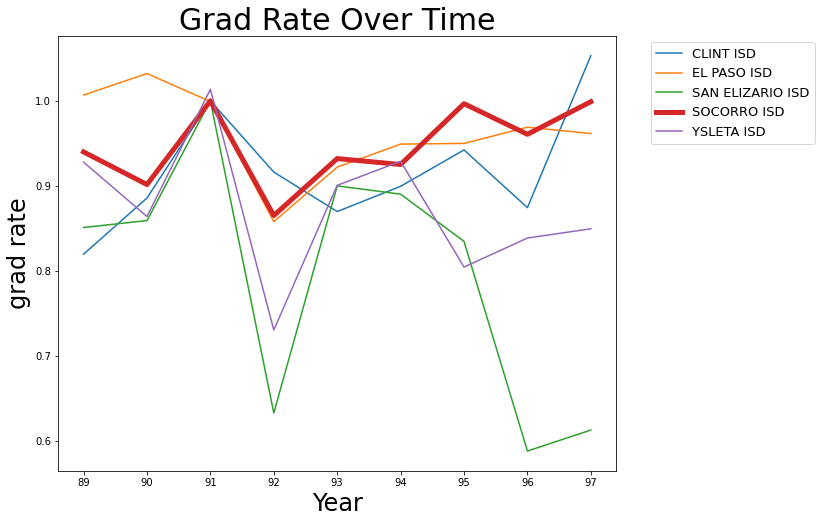

In [12]:
#increase plot size with figsize=(10,8)
fig,ax=plt.subplots(figsize=(10,8))
# plot two lines
x1= y1['year']
y1_1=y1['value']
x2= y2['year']
y2_2= y2['value']
x3= y3['year']
y3_3= y3['value']
x4= y4['year']
y4_4= y4['value']
x5= y5['year']
y5_5= y5['value']


#use (linewidth=5, label='y99') to increase the line width of the two factors i want to bring attention to
plt.plot(x1, y1_1)
plt.plot(x2, y2_2)
plt.plot(x3, y3_3)
plt.plot(x4, y4_4, linewidth=5, label= 'y4')
plt.plot(x5, y5_5)

#plt.plot(full_melt, emp_countB, 'o-b')
# set axis titles
plt.xlabel("Year",fontsize= 24)
plt.ylabel("grad rate",fontsize= 24)
# set chart title
plt.title("Grad Rate Over Time",fontsize= 30)
 #legend- bbox_to_anchor=(1.05, 1.0), loc='upper left' moves the legend to the upper left instead of inside graph
plt.legend(['CLINT ISD', 'EL PASO ISD', 'SAN ELIZARIO ISD', 'SOCORRO ISD','YSLETA ISD'],bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize= 13)
plt.show()